Group

Title: Fraudulent Job Prediction



*   NUR SHAFIQAH BINTI MOHAMAD JOHARI (22119564​)
*   LAW JIA JIN (22071390)
*   LIM SZE SING (22109557)
*   GAN JING WEN (22065433)
*   NUR NAZIFA BINTI ZHAMRI (22088840)


# **1. Introduction**
**1.1 Problem Statement**

The rising cost of living in Malaysia has led to an increase in online fraud cases, particularly job recruitment scams. Many Malaysians, seeking additional income opportunities, fall victim to these scams due to difficulty in distinguishing genuine job openings from fraudulent ones. Current literature compares various machine learning models such as logistic regression, decision trees, random forests, and MLP for detecting fake job postings. However, the trade-off between precision and recall suggests that further refinement and enhancement of these algorithms are necessary to ensure a safer and more reliable job market.

**1.2 Objectives**

*   To evaluate the performace of different models.
*   To identify the most suitable model for detecting fake job postings.
*   To enhance the overall performance of classification results, focusing on precision and recall metrics.



# **2.	Dataset description and pre-processing**



## 2.1 Dataset import

Reference :
https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction?resource=download&select=fake_job_postings.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib  #data visualization library
import matplotlib.pyplot as plt  #'pyplot' module to customize plots
import seaborn as sns  #library of data visualization on top of Matplotlib for statistical graphics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score

#for text processing
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string


matplotlib.rcParams['figure.figsize'] = (10,6)  #To set the default figure size of Matplolib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv('/content/fake_job_postings.csv')
pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_rows', None)
print(df.head(5))

   job_id                                      title            location department salary_range                                    company_profile                                        description                                       requirements                                           benefits  telecommuting  has_company_logo  has_questions employment_type required_experience required_education                   industry              function  fraudulent
0       1                           Marketing Intern    US, NY, New York  Marketing          NaN  We're Food52, and we've created a groundbreaki...  Food52, a fast-growing, James Beard Award-winn...  Experience with content management systems a m...                                                NaN              0                 1              0           Other          Internship                NaN                        NaN             Marketing           0
1       2  Customer Service - Cloud Video Production      NZ, , Auckla

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

List of original features in the dataset:

*   job_id : Unique Job ID
*   title :  The title of the job ad entry
*   location :  Geographical location of the job ad
*   department : Corporate department (e.g. sales)
*   salary_range : Indicative salary range (e.g. $50,000-60,000)
*   company_profile : A brief company description
*   description : The details description of the job ad
*   requirements : Enlisted requirements for the job opening
*   benefits : Enlisted offered benefits by the employer
*   telecommuting : True for telecommuting positions
*   has_company_logo : True if company logo is present
*   has_questions :  True if screening questions are present
*   employment_type : Full-type, Contract, etc
*   required_experience : Executive, Intern, etc
*   required_education :  Doctorate, Bachelor, etc
*   industry : Automotive, Healthcare, Real estate, etc
*   function : Consulting, Research, Sales, etc
*   fraudulent : target (Classification attribute)


## 2.2 Data Pre-processing

### 2.2.1 Duplicate rows and Not-useful Features

In [ ]:
df.drop_duplicates(inplace=True)
df.drop(columns=['job_id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15184 non-null  object
 7   benefits             10668 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

### 2.2.2 Missing Value & Outliers & Text Cleaning

In [ ]:
df.isnull().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
#null value table for calculation
null_table = pd.DataFrame(df.isnull().sum(),columns=['Null_Count'])
null_table['Percentage of Null (%)'] = round((null_table['Null_Count']/len(df))*100,2)
print(null_table)

                     Null_Count  Percentage of Null (%)
title                         0                    0.00
location                    346                    1.94
department                11547                   64.58
salary_range              15012                   83.96
company_profile            3308                   18.50
description                   1                    0.01
requirements               2696                   15.08
benefits                   7212                   40.34
telecommuting                 0                    0.00
has_company_logo              0                    0.00
has_questions                 0                    0.00
employment_type            3471                   19.41
required_experience        7050                   39.43
required_education         8105                   45.33
industry                   4903                   27.42
function                   6455                   36.10
fraudulent                    0                 

In [ ]:
#Remove rows for columns with percentage of null <10%.
columns_remove_null = ['location','description']
df1 = df.dropna(subset= columns_remove_null)
df1.isnull().sum()

title                      0
location                   0
department             11251
salary_range           14687
company_profile         3245
description                0
requirements            2519
benefits                6961
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3256
required_experience     6796
required_education      7820
industry                4654
function                6192
fraudulent                 0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17533 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17533 non-null  object
 1   location             17533 non-null  object
 2   department           6282 non-null   object
 3   salary_range         2846 non-null   object
 4   company_profile      14288 non-null  object
 5   description          17533 non-null  object
 6   requirements         15014 non-null  object
 7   benefits             10572 non-null  object
 8   telecommuting        17533 non-null  int64 
 9   has_company_logo     17533 non-null  int64 
 10  has_questions        17533 non-null  int64 
 11  employment_type      14277 non-null  object
 12  required_experience  10737 non-null  object
 13  required_education   9713 non-null   object
 14  industry             12879 non-null  object
 15  function             11341 non-null  object
 16  fraudulen

In [ ]:
# Make a copy of df1 to df1c to avoid SettingWithCopyWarning
df1c = df1.copy()

# Convert salary_range from categorical to numeric data.
# Split the range into minimum and maximum.
df1c[['salary_min', 'salary_max']] = df1c['salary_range'].str.split('-', expand=True)  # expand=True to expand the split strings into separate columns in df1c

# Convert both columns into numeric.
df1c['salary_min'] = pd.to_numeric(df1c['salary_min'], errors='coerce')
df1c['salary_max'] = pd.to_numeric(df1c['salary_max'], errors='coerce')  # errors='coerce' to convert errors like non-numeric data into NaN

# Create new column by calculating the average salary.
df1c['average_salary'] = (df1c['salary_min'] + df1c['salary_max']) / 2
df1c['average_salary'].fillna(0, inplace=True)
df1c.drop(columns=['salary_range', 'salary_min', 'salary_max'], inplace=True)  # inplace=True to modify the original df directly/permanently

# Create binary feature "salary_specified"
df1c['salary_specified'] = df1c['average_salary'].notnull().astype(int)
df1c.loc[df1c['average_salary'] == 0.0, 'salary_specified'] = 0

# Check DataFrame info after modification.
df1c.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17533 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                17533 non-null  object 
 1   location             17533 non-null  object 
 2   department           6282 non-null   object 
 3   company_profile      14288 non-null  object 
 4   description          17533 non-null  object 
 5   requirements         15014 non-null  object 
 6   benefits             10572 non-null  object 
 7   telecommuting        17533 non-null  int64  
 8   has_company_logo     17533 non-null  int64  
 9   has_questions        17533 non-null  int64  
 10  employment_type      14277 non-null  object 
 11  required_experience  10737 non-null  object 
 12  required_education   9713 non-null   object 
 13  industry             12879 non-null  object 
 14  function             11341 non-null  object 
 15  fraudulent           17533 non-null  int6

In [ ]:
df1c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17533 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                17533 non-null  object 
 1   location             17533 non-null  object 
 2   department           6282 non-null   object 
 3   company_profile      14288 non-null  object 
 4   description          17533 non-null  object 
 5   requirements         15014 non-null  object 
 6   benefits             10572 non-null  object 
 7   telecommuting        17533 non-null  int64  
 8   has_company_logo     17533 non-null  int64  
 9   has_questions        17533 non-null  int64  
 10  employment_type      14277 non-null  object 
 11  required_experience  10737 non-null  object 
 12  required_education   9713 non-null   object 
 13  industry             12879 non-null  object 
 14  function             11341 non-null  object 
 15  fraudulent           17533 non-null  int6

In [ ]:
#Text cleaning for Categorical Data.
#Stopwords removal
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    if isinstance(text, str):  # Check if text is a string
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text.lower())
        cleaned_tokens = [ps.stem(word) for word in tokens if word not in stop_words]
        return ' '.join(cleaned_tokens)
    else:
        return ''  # Return an empty string for non-string inputs

# List of text features in your DataFrame
text_features = ['title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits']

# Loop through each text feature and apply text cleaning
for feature in text_features:
    df1c[feature] = df1c[feature].apply(clean_text)

In [ ]:
# Define the list of text features
text_features = ['company_profile', 'description', 'requirements', 'benefits']

# Iterate over each text feature and create a binary indicator
for feature in text_features:
    df1c[f'{feature}_specified'] = df1c[feature].apply(lambda x: 1 if x.strip() else 0)

In [ ]:
df1c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17533 entries, 0 to 17879
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      17533 non-null  object 
 1   location                   17533 non-null  object 
 2   department                 17533 non-null  object 
 3   company_profile            17533 non-null  object 
 4   description                17533 non-null  object 
 5   requirements               17533 non-null  object 
 6   benefits                   17533 non-null  object 
 7   telecommuting              17533 non-null  int64  
 8   has_company_logo           17533 non-null  int64  
 9   has_questions              17533 non-null  int64  
 10  employment_type            14277 non-null  object 
 11  required_experience        10737 non-null  object 
 12  required_education         9713 non-null   object 
 13  industry                   12879 non-null  object 


In [ ]:
#Split complex features 'location' into simpler features
split_result = df1c['location'].str.split(', ', expand=True)
print(split_result.head())

#result shows not all rows of location contains 3 components

                  0
0    us ny new york
1       nz auckland
2       us ia wever
3  us dc washington
4  us fl fort worth


In [ ]:
# Split the 'location' column into three columns, regardless of whether all components are present
split_result = df1c['location'].str.split(' ', n=2, expand=True)

# Create separate columns for country, state, and city
df1c['country'] = split_result[0]
df1c['state'] = split_result[1] if len(split_result.columns) > 1 else None
df1c['city'] = split_result[2] if len(split_result.columns) > 2 else None

#Drop original column
df1c.drop(columns=['location'], inplace=True)

#Replace all empty value with "Unspecified" in categorical features
categorical_features = ['country', 'state', 'city','employment_type','required_experience','required_education','industry','function']
df1c[categorical_features] = df1c[categorical_features].fillna('Unspecified')

In [ ]:
df1c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17533 entries, 0 to 17879
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      17533 non-null  object 
 1   department                 17533 non-null  object 
 2   company_profile            17533 non-null  object 
 3   description                17533 non-null  object 
 4   requirements               17533 non-null  object 
 5   benefits                   17533 non-null  object 
 6   telecommuting              17533 non-null  int64  
 7   has_company_logo           17533 non-null  int64  
 8   has_questions              17533 non-null  int64  
 9   employment_type            17533 non-null  object 
 10  required_experience        17533 non-null  object 
 11  required_education         17533 non-null  object 
 12  industry                   17533 non-null  object 
 13  function                   17533 non-null  object 


In [ ]:
print(df1c.head(10))

                               title  department                                    company_profile                                        description                                       requirements                                           benefits  telecommuting  has_company_logo  has_questions employment_type  ... fraudulent average_salary salary_specified company_profile_specified  description_specified  requirements_specified  benefits_specified  country     state           city
0                      market intern      market  food52 weve creat groundbreak awardwin cook si...  food52 fastgrow jame beard awardwin onlin food...  experi content manag system major plu blog cou...                                                                 0                 1              0           Other  ...          0            0.0                0                         1                      1                       1                   0       us        ny       new york
1  custom servic

### 2.2.3 Analysis

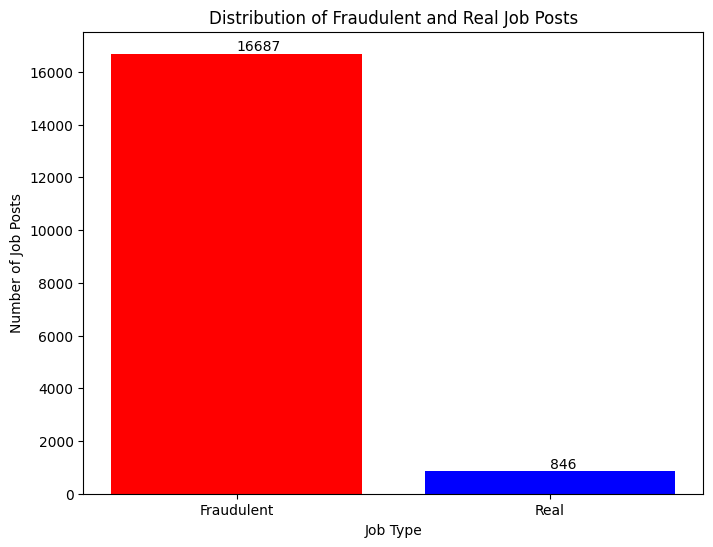

In [ ]:
# Count the number of fraudulent and real job posts
fraudulent_count = len(df1c[df1c['fraudulent'] == 0])
real_count = len(df1c[df1c['fraudulent'] == 1])

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Fraudulent', 'Real'], [fraudulent_count, real_count], color=['red', 'blue'])
plt.xlabel('Job Type')
plt.ylabel('Number of Job Posts')
plt.title('Distribution of Fraudulent and Real Job Posts')

# Add count numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom')

plt.show()

The dataset is imbalanced as the number of fraudulent job (16687 counts) is far higher than number of real job (846 counts). Hence, oversample need to be applied for ensuring the prediction results.

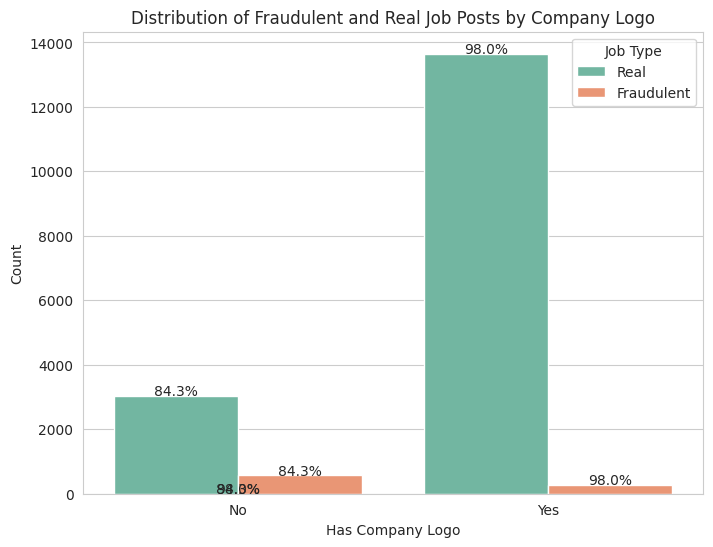

In [ ]:
# Calculate the total count of each category
total_counts = df1c.groupby('has_company_logo')['fraudulent'].count()

# Calculate the percentage of fraudulent and real job posts for each category
fraudulent_counts = df1c[df1c['fraudulent'] == 0].groupby('has_company_logo')['fraudulent'].count()
real_counts = df1c[df1c['fraudulent'] == 1].groupby('has_company_logo')['fraudulent'].count()

fraudulent_percentages = (fraudulent_counts / total_counts) * 100
real_percentages = (real_counts / total_counts) * 100

# Set style for the plot
sns.set_style("whitegrid")

# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='has_company_logo', hue='fraudulent', data=df1c, palette='Set2')

# Add labels and title
plt.xlabel('Has Company Logo')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent and Real Job Posts by Company Logo')

# Show the plot
plt.legend(title='Job Type', labels=['Real', 'Fraudulent'])
plt.xticks([0, 1], ['No', 'Yes'])

# Annotate the percentages above the bars
for i in range(len(ax.patches)):
    # Get the height of the bar
    height = ax.patches[i].get_height()
    # Calculate the percentage based on the index of the bar
    if i % 2 == 0:
        percentage = fraudulent_percentages[0]
    else:
        percentage = fraudulent_percentages[1]
    # Annotate the plot
    ax.text(ax.patches[i].get_x() + ax.patches[i].get_width() / 2., height + 5, f'{percentage:.1f}%', ha='center')


plt.show()

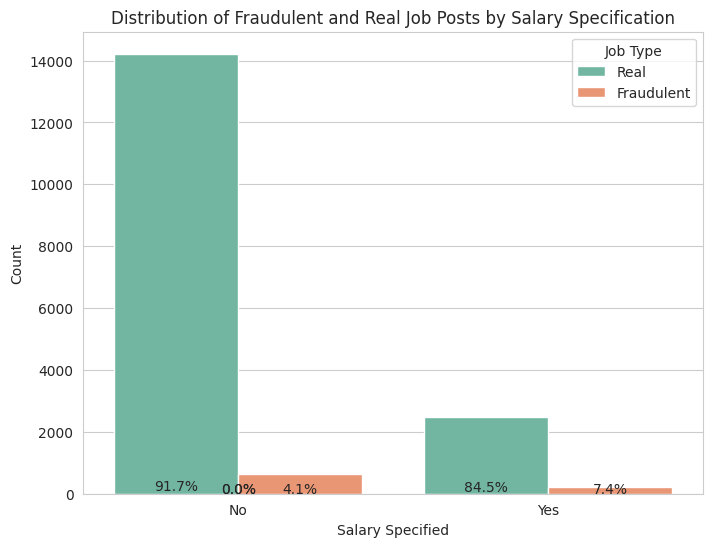

In [ ]:
# Calculate the total count of each category
total_counts = df1c.groupby('salary_specified')['fraudulent'].count()

# Calculate the percentage of fraudulent and real job posts for each category
fraudulent_percentages = df1c[df1c['fraudulent'] == 0].groupby('salary_specified')['fraudulent'].count() / total_counts * 100
real_percentages = df1c[df1c['fraudulent'] == 1].groupby('salary_specified')['fraudulent'].count() / total_counts * 100

# Set style for the plot
sns.set_style("whitegrid")

# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='salary_specified', hue='fraudulent', data=df1c, palette='Set2')

# Add labels and title
plt.xlabel('Salary Specified')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent and Real Job Posts by Salary Specification')

# Show the plot
plt.legend(title='Job Type', labels=['Real', 'Fraudulent'])
plt.xticks([0, 1], ['No', 'Yes'])

# Annotate the percentages above the bars
for i, p in enumerate(ax.patches):
    if i % 2 == 0:
        height = p.get_height() / total_counts[0] * fraudulent_percentages[0]
    else:
        height = p.get_height() / total_counts[1] * fraudulent_percentages[1]
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height:.1f}%', ha='center')

plt.show()


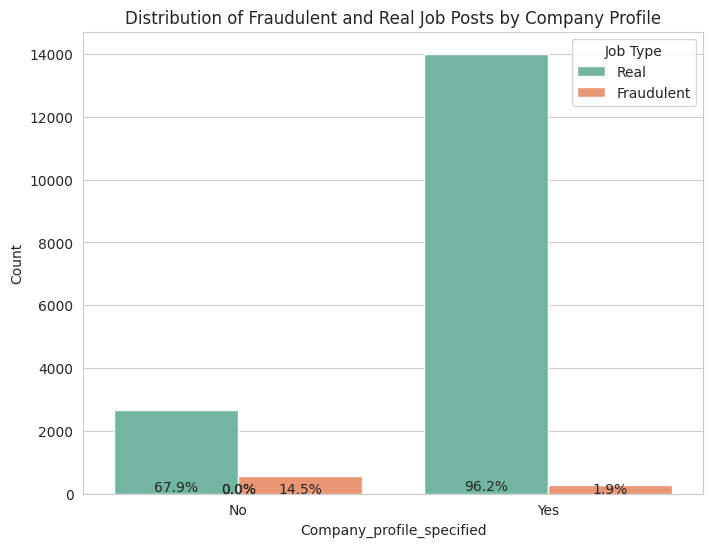

In [ ]:
# Calculate the total count of each category
total_counts = df1c.groupby('company_profile_specified')['fraudulent'].count()

# Calculate the percentage of fraudulent and real job posts for each category
fraudulent_percentages = df1c[df1c['fraudulent'] == 0].groupby('company_profile_specified')['fraudulent'].count() / total_counts * 100
real_percentages = df1c[df1c['fraudulent'] == 1].groupby('company_profile_specified')['fraudulent'].count() / total_counts * 100

# Set style for the plot
sns.set_style("whitegrid")

# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='company_profile_specified', hue='fraudulent', data=df1c, palette='Set2')

# Add labels and title
plt.xlabel('Company_profile_specified')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent and Real Job Posts by Company Profile')

# Show the plot
plt.legend(title='Job Type', labels=['Real', 'Fraudulent'])
plt.xticks([0, 1], ['No', 'Yes'])

# Annotate the percentages above the bars
for i, p in enumerate(ax.patches):
    if i % 2 == 0:
        height = p.get_height() / total_counts[0] * fraudulent_percentages[0]
    else:
        height = p.get_height() / total_counts[1] * fraudulent_percentages[1]
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height:.1f}%', ha='center')

plt.show()


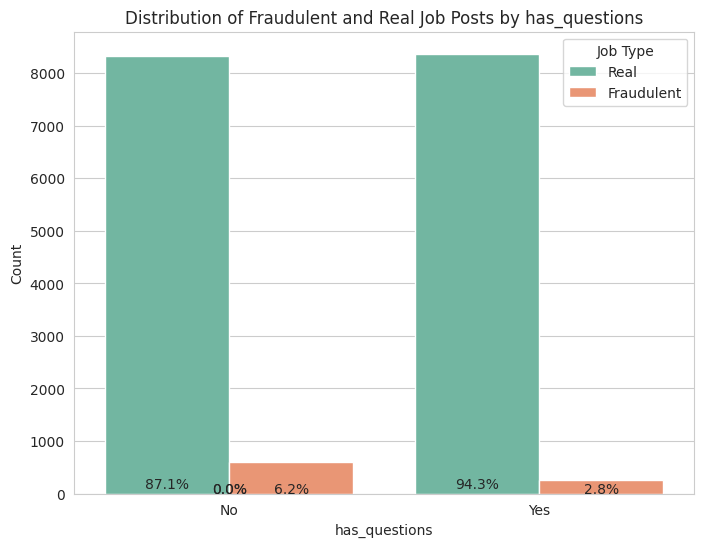

In [ ]:
# Calculate the total count of each category
total_counts = df1c.groupby('has_questions')['fraudulent'].count()

# Calculate the percentage of fraudulent and real job posts for each category
fraudulent_percentages = df1c[df1c['fraudulent'] == 0].groupby('has_questions')['fraudulent'].count() / total_counts * 100
real_percentages = df1c[df1c['fraudulent'] == 1].groupby('has_questions')['fraudulent'].count() / total_counts * 100

# Set style for the plot
sns.set_style("whitegrid")

# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='has_questions', hue='fraudulent', data=df1c, palette='Set2')

# Add labels and title
plt.xlabel('has_questions')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent and Real Job Posts by has_questions')

# Show the plot
plt.legend(title='Job Type', labels=['Real', 'Fraudulent'])
plt.xticks([0, 1], ['No', 'Yes'])

# Annotate the percentages above the bars
for i, p in enumerate(ax.patches):
    if i % 2 == 0:
        height = p.get_height() / total_counts[0] * fraudulent_percentages[0]
    else:
        height = p.get_height() / total_counts[1] * fraudulent_percentages[1]
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height:.1f}%', ha='center')

plt.show()

In [ ]:
# Function to count words in text
def count_words(text):
    tokens = word_tokenize(text)  # Tokenize the text
    return len(tokens)  # Return the number of tokens

# Apply the function to calculate word counts for company profile and job requirements in df1
df1c['company_profile_word_count'] = df1c['company_profile'].apply(count_words)
df1c['requirements_word_count'] = df1c['requirements'].apply(count_words)


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

# Split the dataset into two groups based on 'fraudulent' column
fraudulent_group = df1c[df1c['fraudulent'] == 1]
non_fraudulent_group = df1c[df1c['fraudulent'] == 0]

# Perform statistical tests for 'company_profile' word count
t_stat_cp, p_value_cp = ttest_ind(fraudulent_group['company_profile_word_count'], non_fraudulent_group['company_profile_word_count'])

# Perform statistical tests for 'requirements' word count
t_stat_req, p_value_req = ttest_ind(fraudulent_group['requirements_word_count'], non_fraudulent_group['requirements_word_count'])

# Print the p-values
print("P-value for 'company_profile':", p_value_cp)
print("P-value for 'requirements':", p_value_req)

P-value for 'company_profile': 1.4218900709092661e-100
P-value for 'requirements': 5.800342903162149e-12


Based on these p-values (two-tailed test), which is much smaller than the typical significance level of 0.05, both 'company_profile' and 'requirements' word counts appear to be statistically significant predictors of fraudulent job posts.

### 2.2.4 Data Transformation

In [ ]:
df2 = df1c.copy()

In [ ]:
df2['fraudulent'].value_counts()

fraudulent
0    16687
1      846
Name: count, dtype: int64

In [ ]:
df2['fraudulent'].values

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
fraud = df2[df2['fraudulent']== 1]
fraud.shape

(846, 26)

In [ ]:
not_fraud = df2[df2['fraudulent']== 0]
not_fraud.shape

(16687, 26)

In [ ]:
fraud = fraud.sample(16687, replace=True)
fraud.shape, not_fraud.shape

((16687, 26), (16687, 26))

In [ ]:
#df2 = fraud.append(not_fraud)
#df2.reset_index()
df2 = pd.concat([fraud, not_fraud], ignore_index=True)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33374 entries, 0 to 33373
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       33374 non-null  object 
 1   department                  33374 non-null  object 
 2   company_profile             33374 non-null  object 
 3   description                 33374 non-null  object 
 4   requirements                33374 non-null  object 
 5   benefits                    33374 non-null  object 
 6   telecommuting               33374 non-null  int64  
 7   has_company_logo            33374 non-null  int64  
 8   has_questions               33374 non-null  int64  
 9   employment_type             33374 non-null  object 
 10  required_experience         33374 non-null  object 
 11  required_education          33374 non-null  object 
 12  industry                    33374 non-null  object 
 13  function                    333

In [ ]:
df3 = df2.copy()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

df3['combined_text'] = df3['company_profile'] + " " + df3['description'] + " " + df3['requirements'] + " " + df3['benefits']

n_features = {
    "title" : 100,
    "combined_text" : 500
}

for c, n in n_features.items():
    tfidf = TfidfVectorizer(max_features=n, norm='l2')
    tfidf.fit(df3[c])
    tfidf_train = np.array(tfidf.transform(df3[c]).toarray(), dtype=np.float16)

    for i in range(n_features[c]):
        df3[c + '_tfidf_' + str(i)] = tfidf_train[:, i]

<ipython-input-34-0464961528b3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df3[c + '_tfidf_' + str(i)] = tfidf_train[:, i]
<ipython-input-34-0464961528b3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df3[c + '_tfidf_' + str(i)] = tfidf_train[:, i]
<ipython-input-34-0464961528b3>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmente

In [ ]:
# Drop the original text columns after TF-IDF vectorization
df3.drop(columns=['company_profile', 'description', 'requirements', 'benefits'], inplace=True)

In [ ]:
print(df3.head(30))

                                                title        department  telecommuting  has_company_logo  has_questions employment_type required_experience           required_education                   industry              function  ...  combined_text_tfidf_490  combined_text_tfidf_491  combined_text_tfidf_492  combined_text_tfidf_493  combined_text_tfidf_494  combined_text_tfidf_495  combined_text_tfidf_496 combined_text_tfidf_497 combined_text_tfidf_498 combined_text_tfidf_499
0                                     senior qa engin  inform technolog              0                 1              1       Full-time    Mid-Senior level            Bachelor's Degree  Marketing and Advertising           Engineering  ...                 0.000000                 0.000000                 0.000000                 0.000000                 0.115173                 0.127319                 0.000000                0.049530                0.000000                0.052612
1                       acco

In [ ]:
df4 = df3.copy()

In [ ]:
df4.iloc[:, :23].head(5)

,title,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,...,company_profile_specified,description_specified,requirements_specified,benefits_specified,country,state,city,company_profile_word_count,requirements_word_count,combined_text
0,senior qa engin,inform technolog,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Marketing and Advertising,Engineering,...,1,1,1,1,hyderabad,Unspecified,Unspecified,102,41,aptitud staf solut redesign recruit wheel inno...
1,account sale manag 80130000yr,,0,1,0,Full-time,Associate,High School or equivalent,Facilities Services,Business Development,...,1,1,1,1,us,ny,ithaca,64,26,aggress growth plan place come year provid muc...
2,network market,,0,0,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Unspecified,...,0,1,1,1,us,ca,Unspecified,0,11,look make anywher 600115000 month look paid t...
3,licens practic nurs,,0,0,0,Full-time,Unspecified,Unspecified,Hospital & Health Care,Unspecified,...,0,1,0,0,us,ky,Unspecified,0,0,appli use linkurl80c8ea5f0db2d88ff775ab5a7bf7...
4,account sale manag 80130000yr,,0,1,0,Full-time,Associate,High School or equivalent,Financial Services,Business Development,...,1,1,1,1,us,ny,long island,64,26,aggress growth plan place come year provid muc...


In [ ]:
# One Hot Encoding
cat_cols = ["employment_type", "required_experience", "required_education", "industry", "function", "country","state","city"]
for c in cat_cols:
    encoded = pd.get_dummies(df4[c])
    encoded = encoded.astype(int)  # Convert boolean values to integers (0 or 1)
    df4 = pd.concat([df4, encoded], axis=1)


In [ ]:
drop_cols = ['title', 'department', 'combined_text']
drop_cols += cat_cols
df4 = df4.drop(drop_cols, axis = 1)
df4.head()

,telecommuting,has_company_logo,has_questions,fraudulent,average_salary,salary_specified,company_profile_specified,description_specified,requirements_specified,benefits_specified,...,yorba linda,york,york san francisco,yorkboston,yorkshir,yorktown height,youngstown,zurich,zürich,마포구 동교동
0,0,1,1,1,0.0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0.0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,693600.0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0.0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Get the data types of each column and count their occurrences
dtype_counts = df4.dtypes.value_counts()

# Print the counts of different data types
print("Count of different data types:")
print(dtype_counts)

Count of different data types:
int64      2883
float16     600
float64       1
Name: count, dtype: int64


# **3.	Model Development**

In [ ]:
df5 = df4.copy()

In [ ]:
df5.head()

,telecommuting,has_company_logo,has_questions,fraudulent,average_salary,salary_specified,company_profile_specified,description_specified,requirements_specified,benefits_specified,...,yorba linda,york,york san francisco,yorkboston,yorkshir,yorktown height,youngstown,zurich,zürich,마포구 동교동
0,0,1,1,1,0.0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0.0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,693600.0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0.0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    accuracy = model.score(X_train, y_train) * 100
    print(f"{model.__class__.__name__} Training Accuracy: {accuracy:.2f}%")
    accuracy_test = model.score(X_test, y_test) * 100
    print(f"{model.__class__.__name__} Test Accuracy: {accuracy_test:.2f}%")

    # Generate confusion matrix
    y_pred = model.predict(X_test)
    print(f"\nConfusion Matrix for {model.__class__.__name__}:")
    print(confusion_matrix(y_test, y_pred))

    # Generate classification report
    print(f"\nClassification Report for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred))

    # # Calculate recall score
    # recall = recall_score(y_test, y_pred)
    # print(f"{model.__class__.__name__} Recall: {recall:.2f}")

    return accuracy, accuracy_test

In [ ]:
# List of models to train
models = [
    SGDClassifier(max_iter=5, tol=None),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=3),
    LinearSVC(),
    DecisionTreeClassifier()
]
# X contains all columns except 'fraudulent'
X = df5.drop('fraudulent', axis=1)

# y contains only the 'fraudulent' column
y = df5['fraudulent']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train and evaluate each model
train_accuracies = []
test_accuracies = []
for model in models:
    train_acc, test_acc = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

SGDClassifier Training Accuracy: 75.54%
SGDClassifier Test Accuracy: 75.57%

Confusion Matrix for SGDClassifier:
[[2253 1033]
 [ 598 2791]]

Classification Report for SGDClassifier:
              precision    recall  f1-score   support

           0       0.79      0.69      0.73      3286
           1       0.73      0.82      0.77      3389

    accuracy                           0.76      6675
   macro avg       0.76      0.75      0.75      6675
weighted avg       0.76      0.76      0.75      6675

RandomForestClassifier Training Accuracy: 100.00%
RandomForestClassifier Test Accuracy: 99.99%

Confusion Matrix for RandomForestClassifier:
[[3285    1]
 [   0 3389]]

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3286
           1       1.00      1.00      1.00      3389

    accuracy                           1.00      6675
   macro avg       1.00      1.00      1.00      6675


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC Training Accuracy: 92.66%
LinearSVC Test Accuracy: 91.75%

Confusion Matrix for LinearSVC:
[[3187   99]
 [ 452 2937]]

Classification Report for LinearSVC:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3286
           1       0.97      0.87      0.91      3389

    accuracy                           0.92      6675
   macro avg       0.92      0.92      0.92      6675
weighted avg       0.92      0.92      0.92      6675

DecisionTreeClassifier Training Accuracy: 100.00%
DecisionTreeClassifier Test Accuracy: 98.95%

Confusion Matrix for DecisionTreeClassifier:
[[3216   70]
 [   0 3389]]

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3286
           1       0.98      1.00      0.99      3389

    accuracy                           0.99      6675
   macro avg       0.99      0.99      0.99      6675
weighted avg    

# **4.	Model Implementation & Comparison**

##4.1 Model Comparison

In [ ]:
# Sort test accuracies in descending order along with model names
test_accuracies_sorted = sorted(zip(test_accuracies, [model.__class__.__name__ for model in models]), reverse=True)

# Print the sorted test accuracies with model names
print("\nModel Performance Sorted by Test Accuracy:")
for test_accuracy, model_name in test_accuracies_sorted:
    print(f"{model_name} Test Accuracy = {test_accuracy:.2f}%")


Model Performance Sorted by Test Accuracy:
RandomForestClassifier Test Accuracy = 99.99%
DecisionTreeClassifier Test Accuracy = 98.95%
KNeighborsClassifier Test Accuracy = 97.24%
LinearSVC Test Accuracy = 91.75%
SGDClassifier Test Accuracy = 75.57%


Among all the models, the Random Forest, Decision Tree and KNN have the highest accuracy.

Cross validation will be performed to check on the model performances.

## 4.2 Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, recall_score

In [ ]:

recall_scorer = make_scorer(recall_score, average='macro')
precision_scorer = make_scorer(precision_score, average='macro')
f1_scorer = make_scorer(f1_score, average='macro')

# List of models to evaluate
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=3)),
    ("SGD",  SGDClassifier(max_iter=5, tol=None)),
    ("Linear SVC", LinearSVC())
]

# Iterate over each model, perform cross-validation, and print the results
for model_name, model in models:
    print(f"\nEvaluating {model_name}...")
    try:
        scores = cross_validate(model, X_train, y_train, cv=5, scoring={"accuracy": "accuracy", "recall": recall_scorer,"precision": precision_scorer, "f1": f1_scorer})

        print("Accuracy Scores:", scores['test_accuracy'])
        print("Mean Accuracy:", scores['test_accuracy'].mean())
        print("Standard Deviation of Accuracy:", scores['test_accuracy'].std())

        print("Recall Scores:", scores['test_recall'])
        print("Mean Recall:", scores['test_recall'].mean())
        print("Standard Deviation of Recall:", scores['test_recall'].std())

        print("Precision Scores:", scores['test_precision'])
        print("Mean Precision:", scores['test_precision'].mean())
        print("Standard Deviation of Precision:", scores['test_precision'].std())

        print("F1 Scores:", scores['test_f1'])
        print("Mean F1:", scores['test_f1'].mean())
        print("Standard Deviation of F1:", scores['test_f1'].std())
    except Exception as e:
        print(f"An error occurred while evaluating {model_name}: {e}")


Evaluating Random Forest...
Accuracy Scores: [0.9994382  0.9994382  0.9994382  0.99981273 0.9994381 ]
Mean Accuracy: 0.9995130875691769
Standard Deviation of Accuracy: 0.00014982326215278125
Recall Scores: [0.9994403 0.9994403 0.9994403 0.9998135 0.9994403]
Mean Recall: 0.9995149392908637
Standard Deviation of Recall: 0.00014928156680236171
Precision Scores: [0.99943673 0.99943673 0.99943673 0.99981203 0.99943651]
Mean Recall: 0.9995117440934379
Standard Deviation of Precision: 0.00015014301324068618
F1 Scores: [0.9994382  0.9994382  0.9994382  0.99981273 0.99943809]
Mean F1: 0.9995130822963019
Standard Deviation of F1: 0.00014982445058684342

Evaluating Decision Tree...
Accuracy Scores: [0.99082397 0.98689139 0.98689139 0.98838951 0.98745083]
Mean Accuracy: 0.9880894176342132
Standard Deviation of Accuracy: 0.001472832954257582
Recall Scores: [0.99085821 0.9869403  0.9869403  0.98843715 0.9875    ]
Mean Recall: 0.988135191257439
Standard Deviation of Recall: 0.0014673111433875785
Pre

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy Scores: [0.91853933 0.91292135 0.92846442 0.92958801 0.93219704]
Mean Accuracy: 0.9243420298517094
Standard Deviation of Accuracy: 0.007352808869150797
Recall Scores: [0.91833408 0.91273005 0.92858686 0.92984142 0.93217831]
Mean Recall: 0.9243341450045234
Standard Deviation of Recall: 0.007491359280251616
Precision Scores: [0.92371317 0.91734687 0.93024391 0.93605862 0.93224382]
Mean Recall: 0.9279212778032381
Standard Deviation of Precision: 0.006630556668079112
F1 Scores: [0.91826208 0.91266199 0.92840332 0.92935299 0.93219222]
Mean F1: 0.9241745198538236
Standard Deviation of F1: 0.0074361039895096065


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



*   Random Forest - Average accuracy=99.93% & Average Recall-99.93%
*   Decision Tree - Average accuracy=98.69% & Average Recall-98.69%
*   KNN - Average accuracy=99.69% & Average Recall-96.70%

In summary, these results indicate that Random Forest outperformed both Decision Tree and KNN in terms of average accuracy and consistency of performance. Decision Tree performed slightly worse than Random Forest but still achieved high accuracy, while KNN had the lowest average accuracy and higher variability in performance.

For Random Forest, there's no need for hyperparameter tunning with such high accuracy.

# **5.	Model Evaluation**

Now that we have compared the performance score of our models, we will start to check the models' performances in terms of computation, execution time and memory consumption

In [ ]:
!pip install memory_profiler

In [ ]:
!pip install psutil

In [ ]:
import time
import psutil
import memory_profiler
import cProfile
from sklearn import linear_model

In [ ]:
# 1 Multinomial Naive Bayes

# import time
# import psutil

# start_time = time.time()

# multinomialNB = MultinomialNB()
# multinomialNB.fit(X_train, y_train)
# y_pred = multinomialNB.predict(X_test)

# end_time = time.time()
# execution_time = end_time - start_time
# print("Execution Time:", execution_time, "seconds")
# print("Memory Usage:", psutil.virtual_memory())


In [ ]:
# 2 Gaussian Naive Bayes

# start_time = time.time()

# gaussianNB = GaussianNB()
# gaussianNB.fit(X_train, y_train)
# y_pred = gaussianNB.predict(X_test)

# end_time = time.time()
# execution_time = end_time - start_time
# print("Execution Time:", execution_time, "seconds")
# print("Memory Usage:", psutil.virtual_memory())

In [ ]:
# 1 Stochastic Gradient Descent (SGD):
start_time = time.time()

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")
print("Memory Usage:", psutil.virtual_memory())

Execution Time: 3.6747384071350098 seconds
Memory Usage: svmem(total=13609431040, available=6937899008, percent=49.0, used=6344400896, free=4794220544, active=775892992, inactive=7741313024, buffers=356134912, cached=2114674688, shared=19705856, slab=160391168)


In [ ]:
# 2 Random Forest
start_time = time.time()

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")
print("Memory Usage:", psutil.virtual_memory())

Execution Time: 25.599959135055542 seconds
Memory Usage: svmem(total=13609431040, available=6928580608, percent=49.1, used=6353739776, free=4784750592, active=775917568, inactive=7748157440, buffers=356167680, cached=2114772992, shared=19709952, slab=160370688)


In [ ]:
# 5 Logistic Regression
# start_time = time.time()

# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)

# end_time = time.time()
# execution_time = end_time - start_time
# print("Execution Time:", execution_time, "seconds")
# print("Memory Usage:", psutil.virtual_memory())

In [ ]:
# 3 KNN
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")
print("Memory Usage:", psutil.virtual_memory())

Execution Time: 57.65308403968811 seconds
Memory Usage: svmem(total=13609431040, available=6611709952, percent=51.4, used=6670581760, free=4467802112, active=776011776, inactive=8057184256, buffers=356208640, cached=2114838528, shared=19714048, slab=160485376)


In [ ]:
# 7 Perceptron
# start_time = time.time()

# perceptron = Perceptron(max_iter=5)
# perceptron.fit(X_train, y_train)
# y_pred = perceptron.predict(X_test)

# end_time = time.time()
# execution_time = end_time - start_time
# print("Execution Time:", execution_time, "seconds")
# print("Memory Usage:", psutil.virtual_memory())

In [ ]:
# 4 Linear Support Vector Machine
start_time = time.time()

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")
print("Memory Usage:", psutil.virtual_memory())

Execution Time: 25.77653455734253 seconds
Memory Usage: svmem(total=13609431040, available=6602805248, percent=51.5, used=6679490560, free=4458901504, active=776044544, inactive=8055783424, buffers=356208640, cached=2114830336, shared=19714048, slab=160456704)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# 5 Decision Tree
start_time = time.time()

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")
print("Memory Usage:", psutil.virtual_memory())

Execution Time: 20.216733694076538 seconds
Memory Usage: svmem(total=13609431040, available=6613340160, percent=51.4, used=6668988416, free=4469460992, active=776069120, inactive=8052752384, buffers=356216832, cached=2114764800, shared=19714048, slab=160428032)


The highest execution time is from KNN (57.65 secs) and the lowest time is Stochastic Gradient Descent (SGD) (3.67 secs)

If we only consider the fastest executed model - SGD, this might not be ideal for the project as its accuracy (78%) and recall (78%) scores are rather low

We have prior identified the best model that has the highest average accuracy & recall score is Random Forest. Looking at the execution time of the model (25.60 secs), it's rather moderate.

To ensure that we can get the best balance of performance of the model, Random Forest can be an ideal fit for the deployment. We are predicting that the execution time of our product will take around 30 seconds to predict the outcome of fraudelent job posting.

As for memory usage (RAM) and computational usage (CPU) we assessed this on the finalized model code in https://colab.research.google.com/drive/1oawu_JypP45ysYRo5L0H-WJCifWZsqvi#scrollTo=Y1sR93SLP6dz where it was shown as :


*  Execution Time: 173.4914116859436 seconds
*  Memory Used: 1.2283592224121094 GB
*  CPU Usage: 19.0 %


# **6.	Model Deployment**

Now that we have conclude that Random Forest is the best model, we will transform the trained model into one code to Streamlit App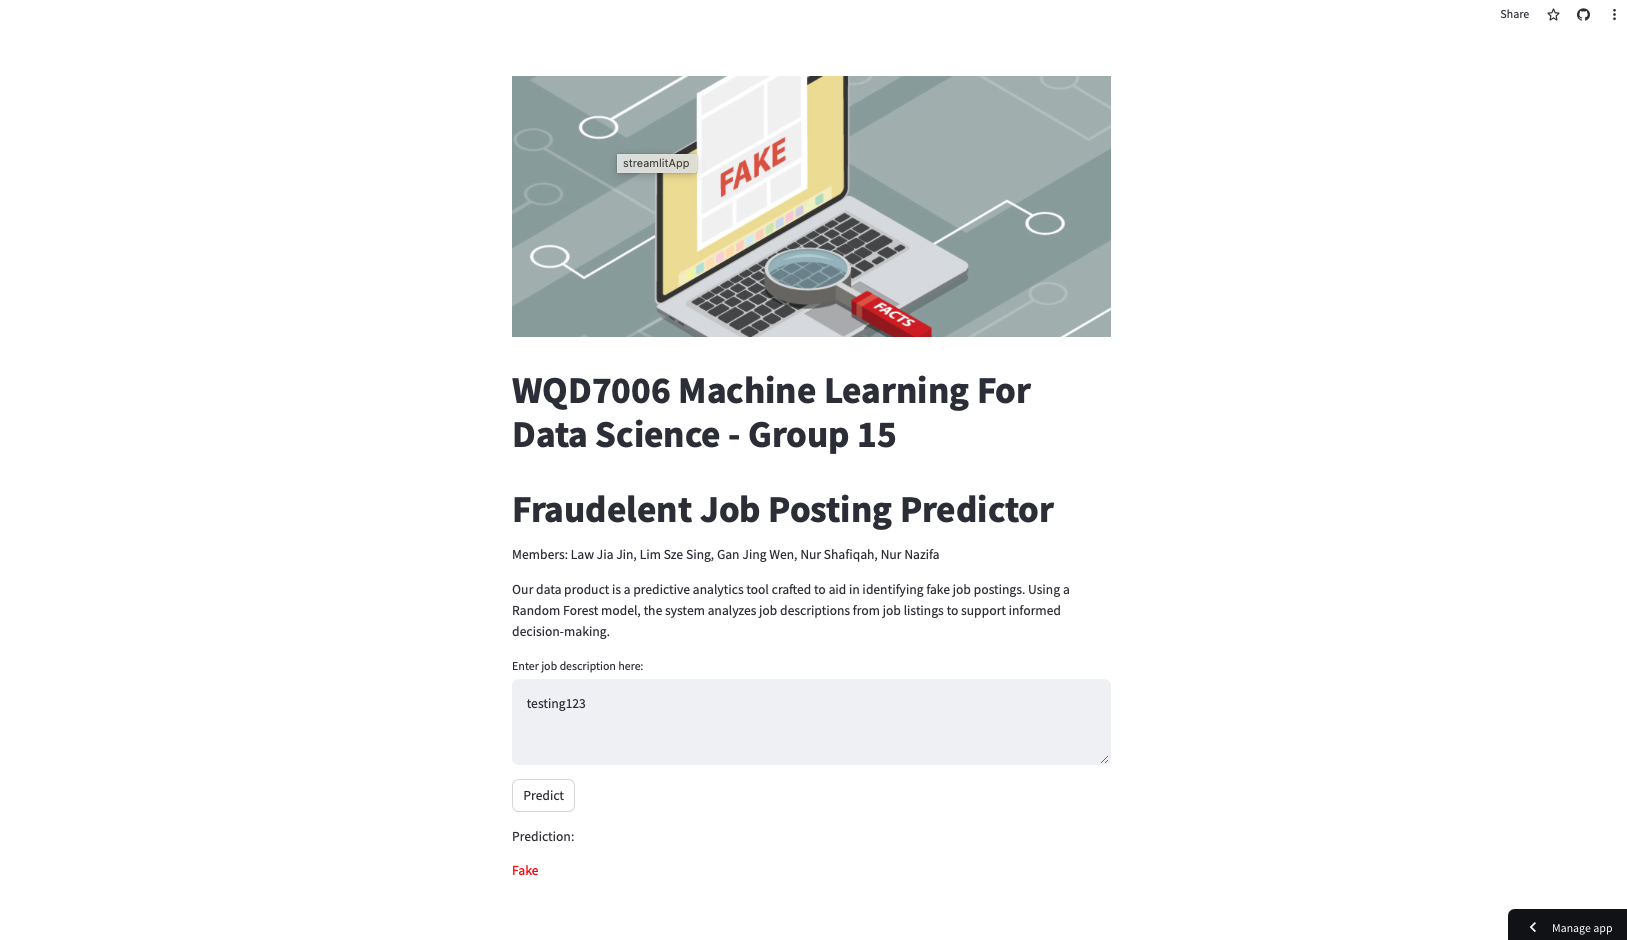

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
# -*- coding: utf-8 -*-
"""testing.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1oawu_JypP45ysYRo5L0H-WJCifWZsqvi
"""

import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Add a background image using custom CSS
background_image_path = "header.jpg"
st.image(background_image_path, use_column_width=True)  # Adjust 'use_column_width' based on your preference
st.markdown("# WQD7006 Machine Learning For Data Science - Group 15")
st.title('Fraudelent Job Posting Predictor')
st.write("Members: Law Jia Jin, Lim Sze Sing, Gan Jing Wen, Nur Shafiqah, Nur Nazifa")
st.write("Our data product is a predictive analytics tool crafted to aid in identifying fake job postings. Using a Random Forest model, the system analyzes job descriptions from job listings to support informed decision-making.")

# Load data from the CSV file
data = pd.read_csv("fake_job_postings.csv")

# Extract job descriptions and labels from the data
train_data = data['description'].astype(str).tolist()  # 'description' is the column containing job descriptions
train_labels = data['fraudulent'].tolist()  # 'fraudulent' is the column containing labels (1 for fake, 0 for real)

# Define the model
rf_classifier = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier()),
])

# Fit TF-IDF vectorizer and classifier with training data
rf_classifier.fit(train_data, train_labels)

def predict_fake_job_posting(job_description):
    # Make predictions using the loaded model
    prediction = rf_classifier.predict([job_description])
    return prediction[0]

def main():
    job_description = st.text_area('Enter job description here:')
    if st.button('Predict'):
        prediction = predict_fake_job_posting(job_description)
        if prediction == 1:
            st.write('Prediction: ', unsafe_allow_html=True)
            st.write('<span style="color:red;">Fake</span>', unsafe_allow_html=True)
        else:
            st.write('Prediction: ', unsafe_allow_html=True)
            st.write('<span style="color:green;">Real</span>', unsafe_allow_html=True)

if __name__ == '__main__':
    main()

2024-05-19 14:20:04.648 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-05-19 14:20:31.326 Session state does not function when running a script without `streamlit run`


To summarize,

*   The finalized code and setup has been done in Github repository https://github.com/tomeipau/fakejobsdeploy2
*   Link to Model Deployment : https://fakejobsdeploy-wqd7006-group15.streamlit.app/




# **11.	Conclusion and future work**
